# **Data Science Project: Final Report**

## **Introduction:**
### **Background Information:**

---

### **Question:**

**What are the kinds of players, according to "experience", "gender" and "age", are most likely to be a "contributor"of a large amount of data of one hour or more?**

---

### **Data Description:**
#### Players Dataset:
- Number of Observations: 196
- Number of Variables: 9
- Name, Type and Description of Variables
    - experience (chr): Gaming experience of the player                      
    - subscribe (lgl): Whether the player has subscribed or not            
    - hashedEmail (chr)  : Encrypted 64-character hashcode of player's email ID
    - played_hours (dbl)  : Number of hours an individual player played         
    - name (chr): Name of the player                                  
    - gender (chr): Gender of the player                                
    - age (dbl): Age of the player                                   
    - individualId (lgl): ID of the player                                    
    - organizationName (lgl): Organization to which the player belongs 

## **Methods & Results:**
### **Methods used in analysis:**
- a
- b
- c

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Reading data
players_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")

players_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


In [3]:
# Wrangling data
test_data <- players_data |>
  mutate(
    contributor = factor(if_else(played_hours >= 1, "Yes", "No")),
    experience = as.factor(experience),
    gender = as.factor(gender),
    age = as.integer(age)
  ) |>
  select(experience, gender, age, contributor)

test_data

experience,gender,age,contributor
<fct>,<fct>,<int>,<fct>
Pro,Male,9,Yes
Veteran,Male,17,Yes
Veteran,Male,17,No
⋮,⋮,⋮,⋮
Amateur,Prefer not to say,17,No
Amateur,Male,17,Yes
Pro,Other,91,No


In [4]:
# Summarizing data

# distribution of exprience
test_data |>
  group_by(experience) |>
  summarise(count = n())

# distribution of gender
test_data |>
  count(gender)

# distribution of age
test_data |>
  summarise(
    min_age = min(age),
    max_age = max(age),
    mean_age = mean(age),
    median_age = median(age)
  )

# proportion of contributor vs. non-contributors
test_data |>
  count(contributor) |>
  mutate(proportion = n / sum(n))

experience,count
<fct>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<fct>,<int>
Agender,2
Female,37
Male,124
⋮,⋮
Other,1
Prefer not to say,11
Two-Spirited,6


min_age,max_age,mean_age,median_age
<int>,<int>,<dbl>,<dbl>
8,99,21.28061,19


contributor,n,proportion
<fct>,<int>,<dbl>
No,154,0.7857143
Yes,42,0.2142857


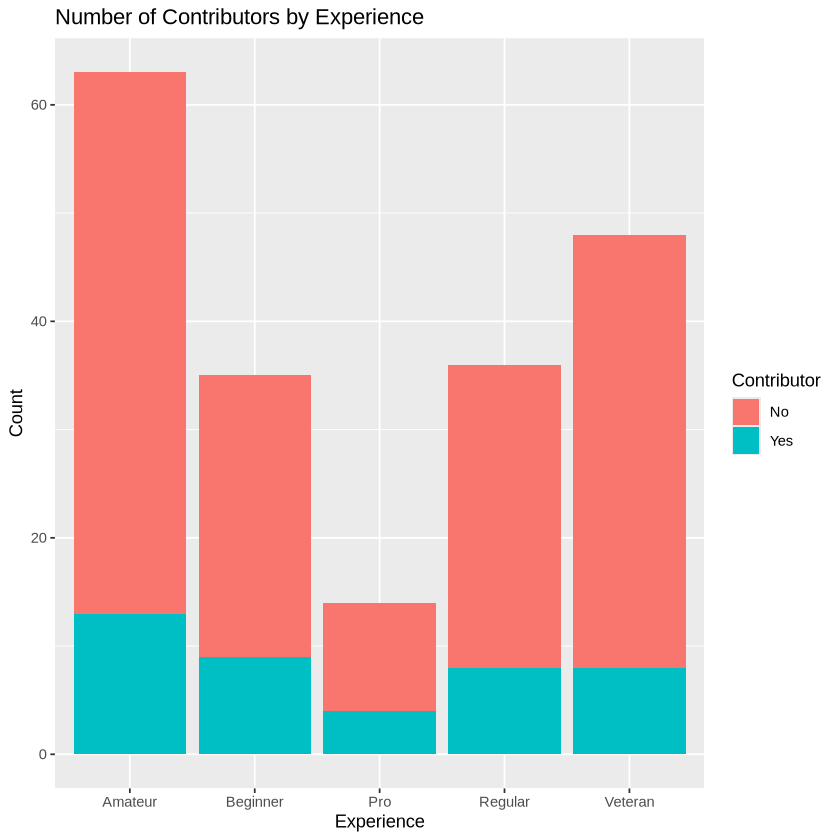

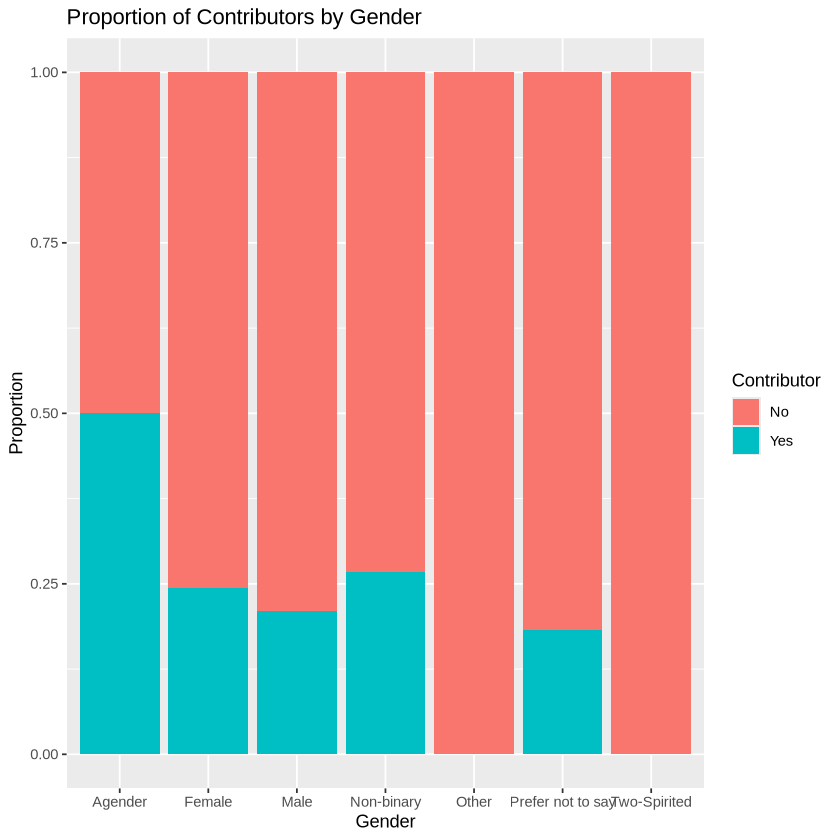

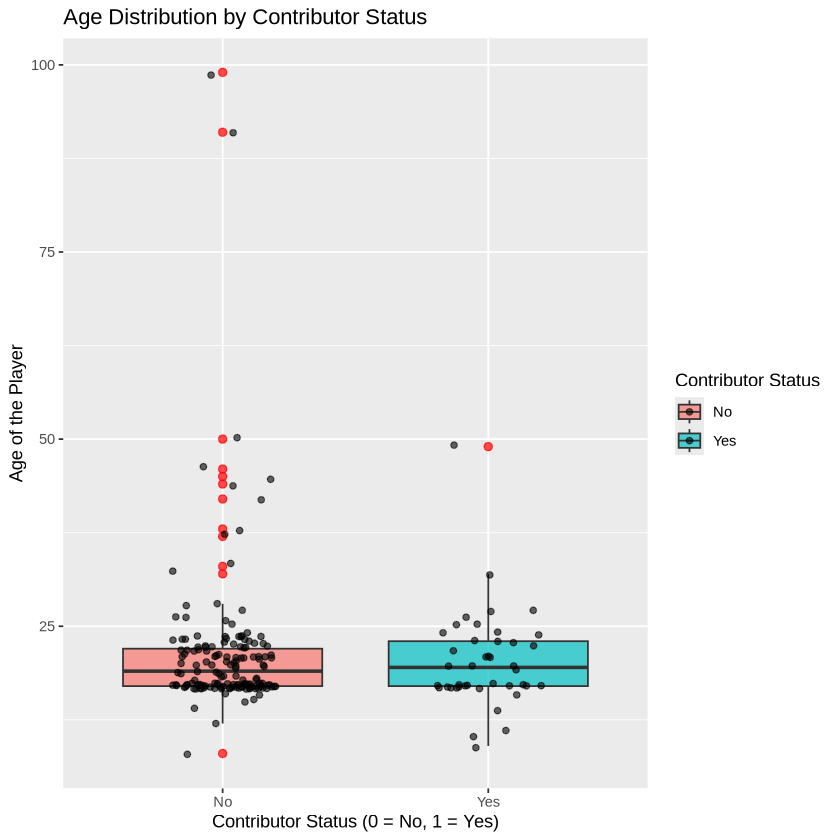

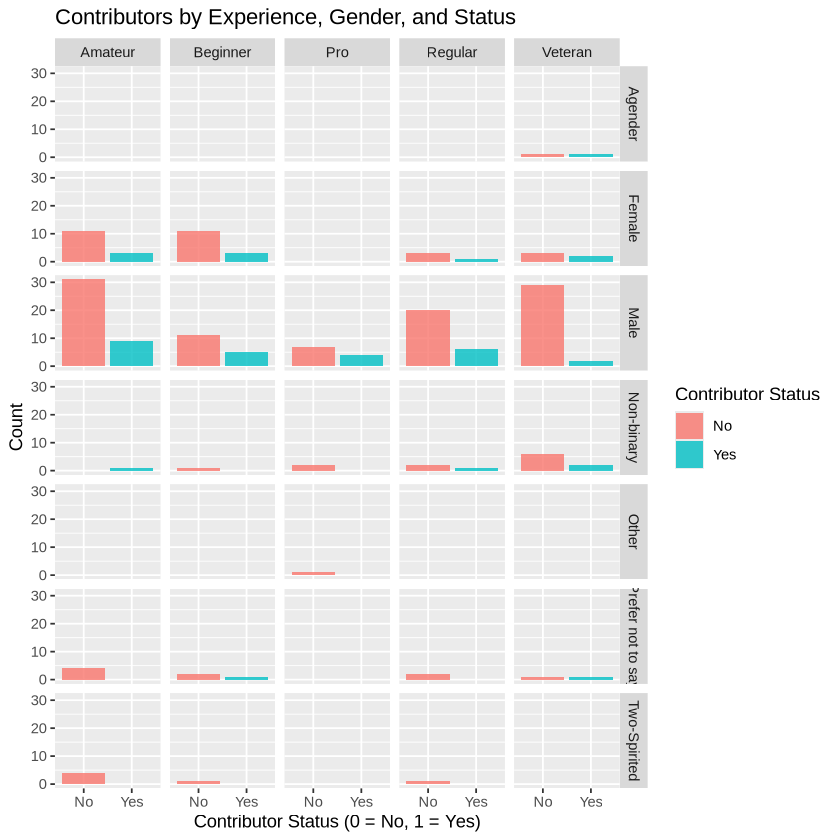

In [16]:
# Visualizing data

ggplot(test_data, aes(x = experience, fill = factor(contributor))) +
    geom_bar(position = "stack") +
    labs(
        title = "Number of Contributors by Experience",
        x = "Experience",
        y = "Count",
        fill = "Contributor"
    )

ggplot(test_data, aes(x = gender, fill = factor(contributor))) +
    geom_bar(position = "fill") +
    labs(
        title = "Proportion of Contributors by Gender",
        x = "Gender",
        y = "Proportion",
        fill = "Contributor"
    )

ggplot(test_data, aes(x = factor(contributor), y = age, fill = factor(contributor))) +
    geom_boxplot(alpha = 0.7, outlier.size = 2, outlier.color = "red") +
    geom_jitter(width = 0.2, size = 1.5, alpha = 0.6, color = "black") +
    labs(
        title = "Age Distribution by Contributor Status",
        x = "Contributor Status (0 = No, 1 = Yes)",
        y = "Age of the Player",
        fill = "Contributor Status"
    )

ggplot(test_data, aes(x = factor(contributor), fill = factor(contributor))) +
    geom_bar(position = "stack", alpha = 0.8) +
    facet_grid(gender ~ experience) +
    labs(
        title = "Contributors by Experience, Gender, and Status",
        x = "Contributor Status (0 = No, 1 = Yes)",
        y = "Count",
        fill = "Contributor Status"
    )


In [7]:
# Setting seed for reproducibility
set.seed(123)

# Splitting Data
players_split <- initial_split(test_data, prop = 0.75, strata = contributor)
players_train <- training(players_split)
players_test <- testing(players_split)

# Creating recipe
players_recipe <- recipe(contributor ~ experience + gender + age, data = players_train) |>
    step_scale(all_numeric_predictors()) |>
    step_center(all_numeric_predictors()) |>
    step_dummy(all_nominal_predictors())

# Defining KNN specification
players_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [8]:
# Cross-validation folds
players_folds <- vfold_cv(players_train, v = 5, strata = contributor)
players_k_values <- tibble(neighbors = seq(1, 20, by = 2))

# Tuning the model
players_knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_knn_spec) |>
    tune_grid(resamples = players_folds, grid = players_k_values) |>
    collect_metrics()

# Extracting best k from results
accuracies <- players_knn_results |> 
    filter(.metric == "accuracy")

best_k <- accuracies |> 
    arrange(desc(mean)) |> 
    slice(1) |> 
    pull(neighbors)

In [9]:
# Define KNN specification with best k
final_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# Creating workflow with final specification
final_knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(final_knn_spec) |>
    fit(players_train)

# Making predictions on the testing data
test_predictions <- predict(final_knn_fit, new_data = players_test) |>
    bind_cols(players_test)
test_predictions

.pred_class,experience,gender,age,contributor
<fct>,<fct>,<fct>,<int>,<fct>
No,Veteran,Male,17,No
No,Amateur,Female,21,No
No,Regular,Male,21,No
⋮,⋮,⋮,⋮,⋮
No,Veteran,Male,17,No
No,Pro,Male,21,No
No,Amateur,Female,22,No


In [10]:
# Evaluate test metrics
test_results <- test_predictions |>
    mutate(correctness = if_else(contributor == .pred_class, "Correct", "Incorrect"))
cat("Final test result: \n")
test_results

cat("\n")

test_accuracy <- test_results |>
  summarise(accuracy = mean(correctness == "Correct")) |>
  pull(accuracy)

cat("The accuracy of the test result is:", test_accuracy, "\n")
cat("Best k:", best_k, "\n")

# Calculate accuracy
accuracy_result <- test_predictions |>
  metrics(truth = contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy")
cat("\nAccuracy:\n")
print(accuracy_result)

cat("\n")

# Calculate precision
precision_result <- test_predictions |>
  precision(truth = contributor, estimate = .pred_class)
cat("\nPrecision:\n")
print(precision_result)

cat("\n")

# Calculating recall
recall_result <- test_predictions |>
  recall(truth = contributor, estimate = .pred_class)
cat("\nRecall:\n")
print(recall_result)

cat("\n")

# Confusion matrix
confusion_matrix <- test_predictions |>
  conf_mat(truth = contributor, estimate = .pred_class)
cat("\nConfusion Matrix:\n")
print(confusion_matrix)

Final test result: 


.pred_class,experience,gender,age,contributor,correctness
<fct>,<fct>,<fct>,<int>,<fct>,<chr>
No,Veteran,Male,17,No,Correct
No,Amateur,Female,21,No,Correct
No,Regular,Male,21,No,Correct
⋮,⋮,⋮,⋮,⋮,⋮
No,Veteran,Male,17,No,Correct
No,Pro,Male,21,No,Correct
No,Amateur,Female,22,No,Correct



The accuracy of the test result is: 0.76 
Best k: 11 

Accuracy:
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary          0.76


Precision:
# A tibble: 1 × 3
  .metric   .estimator .estimate
  <chr>     <chr>          <dbl>
1 precision binary         0.776


Recall:
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 recall  binary         0.974


Confusion Matrix:
          Truth
Prediction No Yes
       No  38  11
       Yes  1   0


## **Discussion:**

## **References:**

- https://www.geeksforgeeks.org/box-plot-in-r-using-ggplot2/
- https://www.geeksforgeeks.org/how-to-plot-3d-scatter-diagram-using-ggplot-in-r/
- https://recipes.tidymodels.org/articles/Simple_Example.html